In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("laptop_data.csv")

df.head(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [4]:
df.shape

(1303, 12)

In [5]:
df.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [6]:
df.duplicated().sum()
df.isnull().sum()
# no duplicates or null values

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df.drop(columns=['Unnamed: 0'],inplace = True)
# useless column

In [8]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [9]:
df['Ram'] = df['Ram'].str.replace('GB','')

In [10]:
df['Weight'] =  df['Weight'].str.replace('kg','')
# removing 'GB' and 'kg' from these 2 columns respectively (ML deals with numeric only)

In [11]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
# converting from 'object' to int and float

In [12]:
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt

<Axes: xlabel='Price', ylabel='Count'>

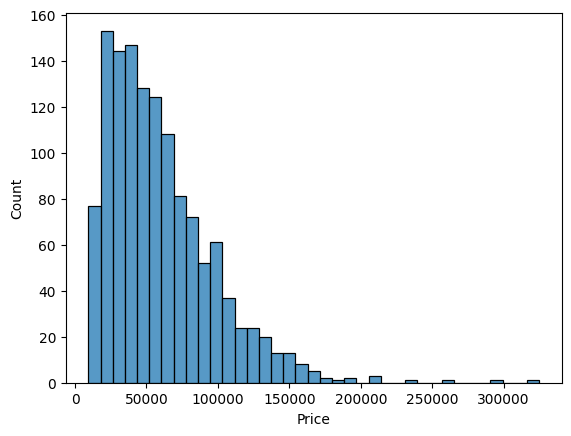

In [14]:
sns.histplot(df['Price'])

# lower price laptops are more in number

<Axes: xlabel='Company'>

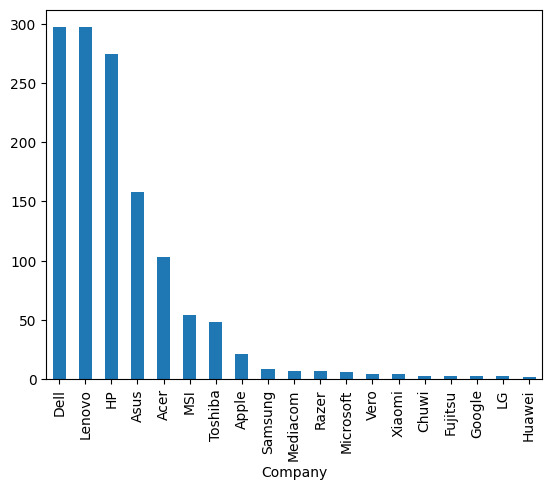

In [15]:
df['Company'].value_counts().plot(kind = 'bar')

###### comparing price with other independent variables (i.e. columns)

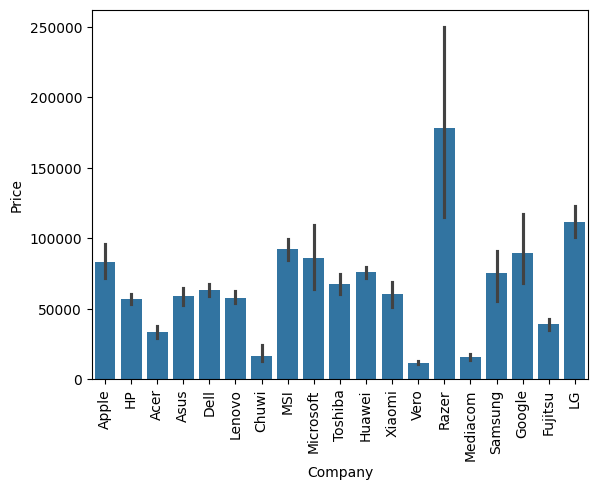

In [16]:
sns.barplot(x = df['Company'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='TypeName'>

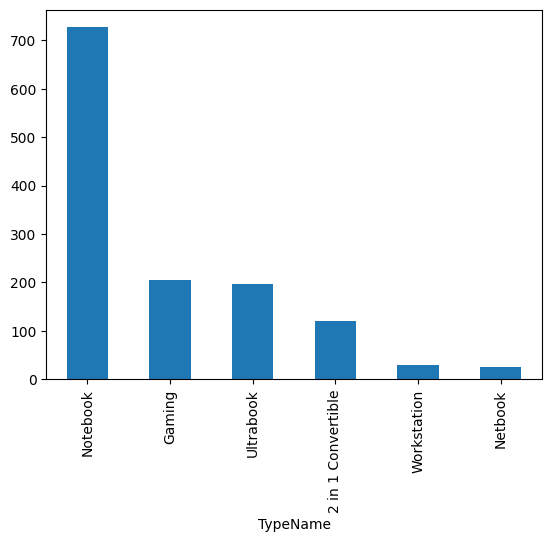

In [17]:
df['TypeName'].value_counts().plot(kind = 'bar')

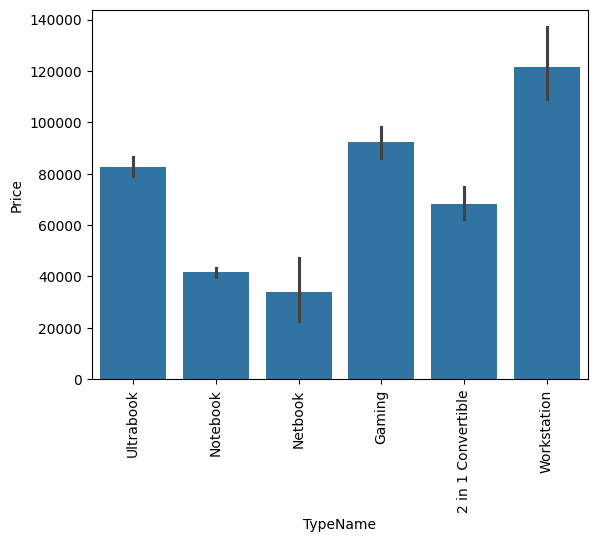

In [18]:
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Count'>

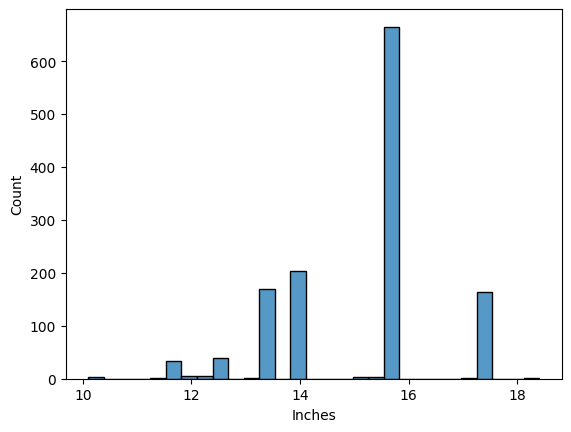

In [19]:
sns.histplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

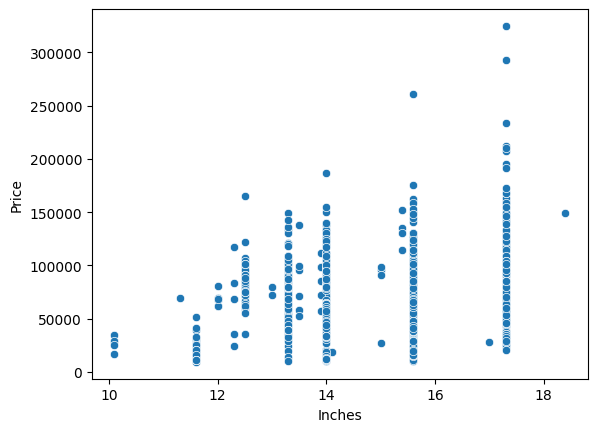

In [20]:
sns.scatterplot(x = df['Inches'], y = df['Price'])
# There is no strong dependency between 'Inches' and 'Price'

In [21]:
df['ScreenResolution'].value_counts()
# this shows that there is a need to extract more columns from this column i.e 1) If IPS Panel present 2) Is the laptop touchscreen?

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [22]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [23]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
511,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,500GB HDD,Nvidia GeForce 940MX,Windows 10,2.20,34045.9200,0
16,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R5 M430,Windows 10,2.20,39693.6000,0
627,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,No OS,2.20,24935.0400,0
1200,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,128GB SSD,AMD Radeon R7 M440,Windows 10,2.30,26586.7200,0
1059,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.94,96916.3200,0
833,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.70,63190.0800,0
36,Acer,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4,1TB HDD,Intel HD Graphics 620,Linux,2.10,19553.7600,0
834,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,87912.0000,0
788,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.20,122490.7200,0
513,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.20,64961.1072,0


<Axes: xlabel='TouchScreen'>

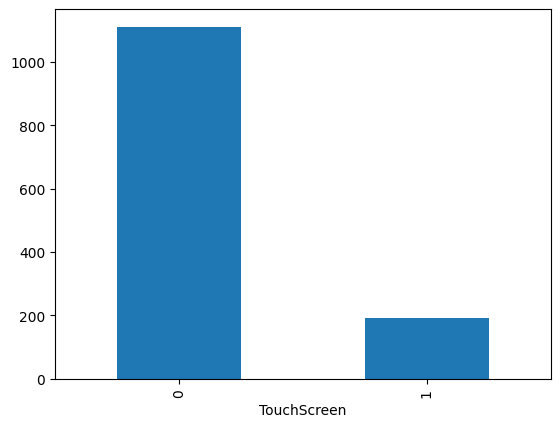

In [24]:
df['TouchScreen'].value_counts().plot(kind = 'bar')

<Axes: xlabel='TouchScreen', ylabel='Price'>

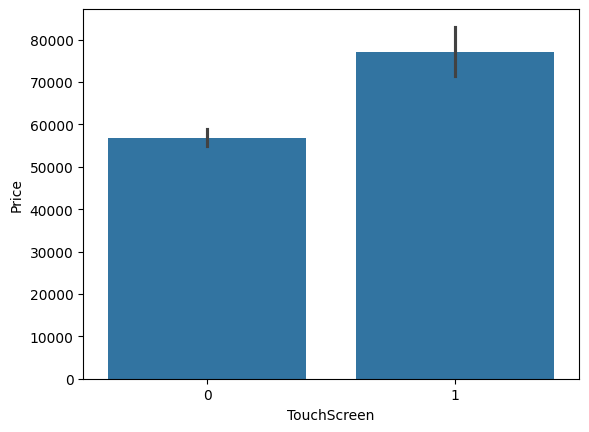

In [25]:
sns.barplot(x = df['TouchScreen'], y = df['Price'])

In [26]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS'in x else 0)

In [27]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips', ylabel='Price'>

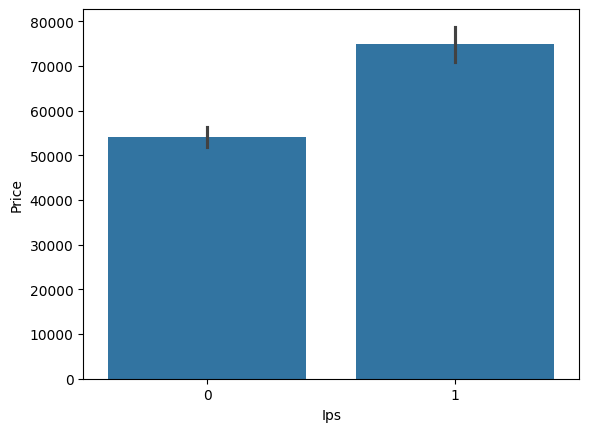

In [28]:
sns.barplot(x = df['Ips'], y = df['Price'])

In [29]:
new = df['ScreenResolution'].str.split('x', n=1, expand = True)

In [30]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [31]:
df.head(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,1366,768
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,IPS Panel Retina Display 2880,1800
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,1440,900
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,Full HD 1920,1080
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,IPS Panel Full HD 1920,1080


In [32]:
df['X_res'] = df['X_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [33]:
df.info()
# need to convert X-res, Y_res into int 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [34]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [35]:
df.select_dtypes(include=['number']).corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [36]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [37]:
df.drop(columns=['ScreenResolution'], inplace =True)

In [38]:
df.drop(columns=['Inches', 'X_res', 'Y_res'], inplace =True)
# calculated 'ppi' which is the ultimatum to these 3 columns so dropping these

In [39]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [ ]:
df['Cpu_name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
# extracts first 3 words from Cpu column using .split() function then convert them from list to string using .join

In [43]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel processor'
        else:
            return 'AMD Processor'

In [44]:
df['Cpu brand'] = df['Cpu_name'].apply(fetch_processor)

In [47]:
df.iloc[299:]

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_name,Cpu brand
299,Asus,Ultrabook,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Nvidia GeForce 940MX,Windows 10,1.63,78215.04,0,0,141.211998,Intel Core i7,Intel Core i7
300,Asus,Notebook,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.30,27119.52,0,0,111.935204,Intel Core i3,Intel Core i3
301,Asus,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.90,113060.16,0,0,127.335675,Intel Core i7,Intel Core i7
302,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,6,1TB HDD,Nvidia GeForce GTX 940M,Windows 10,2.80,34578.72,0,0,106.113062,Intel Core i5,Intel Core i5
303,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Nvidia GeForce 940MX,No OS,2.20,29250.72,0,0,100.454670,Intel Core i5,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1,1,157.350512,Intel Core i7,Intel Core i7
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1,1,276.053530,Intel Core i7,Intel Core i7
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0,0,111.935204,Intel Celeron Dual,Other Intel processor
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0,0,100.454670,Intel Core i7,Intel Core i7


<Axes: xlabel='Cpu brand'>

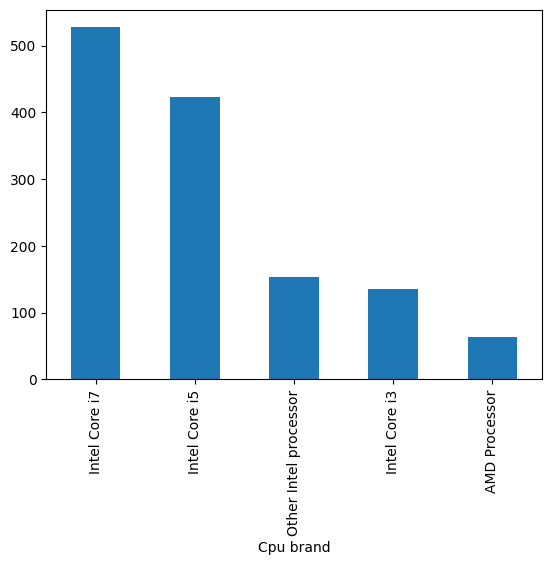

In [48]:
df['Cpu brand'].value_counts().plot(kind = 'bar')

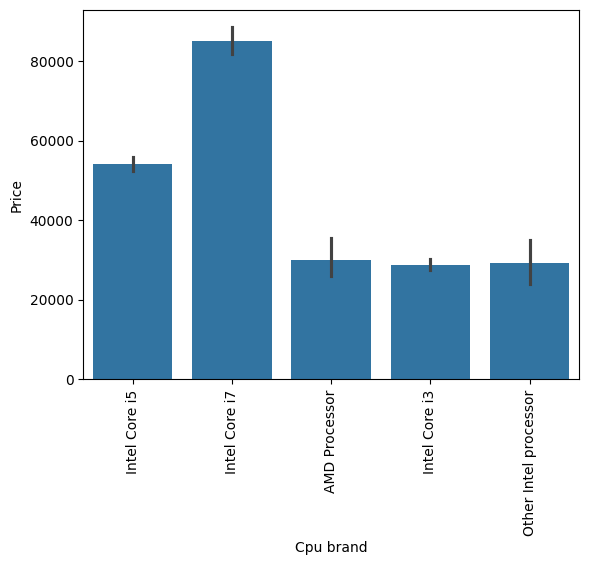

In [50]:
sns.barplot(x = df['Cpu brand'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [51]:
df.drop(columns=['Cpu','Cpu_name'], inplace = True)

In [59]:
df.head(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None,0,1,0,0
5,Acer,Notebook,4,500 HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,100.454670,AMD Processor,500 HDD,None,1,0,0,0
6,Apple,Ultrabook,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,Intel Core i7,256 Flash Storage,None,0,0,0,0
7,Apple,Ultrabook,8,256 Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,127.677940,Intel Core i5,256 Flash Storage,None,0,0,0,0
8,Asus,Ultrabook,16,512 SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,157.350512,Intel Core i7,512 SSD,None,0,1,0,0
9,Acer,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,157.350512,Intel Core i5,256 SSD,None,0,1,0,0


<Axes: xlabel='Ram'>

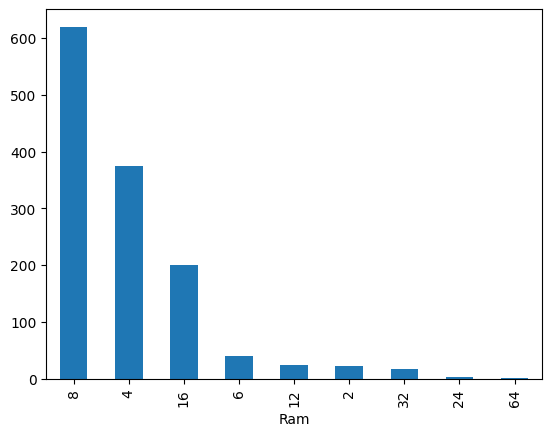

In [53]:
df['Ram'].value_counts().plot(kind = 'bar')

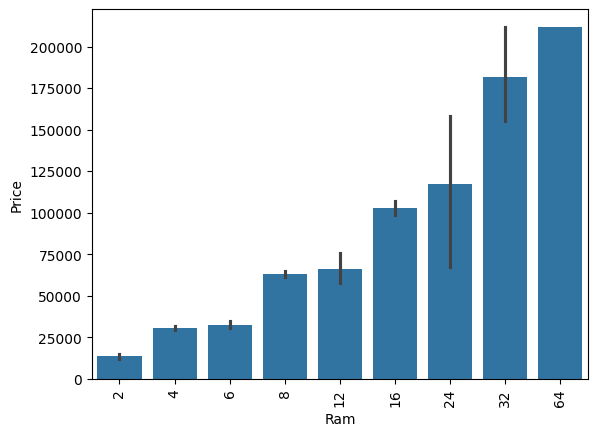

In [54]:
sns.barplot(x = df['Ram'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
# cleaning units and also stding them
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')


<>:1: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
<>:1: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
C:\Users\Kimay\AppData\Local\Temp\ipykernel_19528\3337492538.py:1: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
  df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)


In [ ]:
# Splitting dual storage
new = df['Memory'].str.split("+",n=1, expand = True)
df['first'] = new[0]
df['first'] = df['first'].str.strip()
df['second'] = new[1]


In [67]:
# working on layer 1 i.e new[0]
df['Layer1HDD'] = df['first'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer1Flash_storage'] = df['first'].apply(lambda x:1 if "Flash storage" in x else 0)
df['first'] = df['first'].str.replace(r'\D','', regex = True)

In [71]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [68]:

# working on layer 2 i.e new[1]
df["second"].fillna("0", inplace = True)
df['Layer2HDD'] = df['second'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer2Flash_storage'] = df['second'].apply(lambda x:1 if "Flash storage" in x else 0)
df['second'] = df['second'].str.replace(r'\D','', regex = True)


In [69]:
df['first'] = df['first'].astype(int)
df['second'] = df["second"].astype(int)

In [70]:
df['HDD'] = (df['first']*df['Layer1HDD']+ df['second']*df['Layer2HDD'])
df['SSD'] = (df['first']*df['Layer1SSD']+ df['second']*df['Layer2SSD'])
df['Hybrid'] = (df['first']*df['Layer1Hybrid']+ df['second']*df['Layer2Hybrid'])
df['Flash_storage'] = (df['first']*df['Layer1Flash_storage']+ df['second']*df['Layer2Flash_storage'])

df.drop(columns=['first','second','Layer1HDD','Layer2HDD','Layer1SSD','Layer2SSD','Layer1Hybrid','Layer2Hybrid','Layer1Flash_storage','Layer2Flash_storage'], inplace = True)

In [72]:
df.select_dtypes(include=['number']).corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_storage         NaN
Name: Price, dtype: float64

In [73]:
df.drop(columns=['Hybrid','Flash_storage'],inplace = True)

In [85]:
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,128 SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,128 Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,256 SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,512 SSD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,256 SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [77]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [79]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [82]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [81]:
df = df[df['Gpu brand'] != 'ARM']

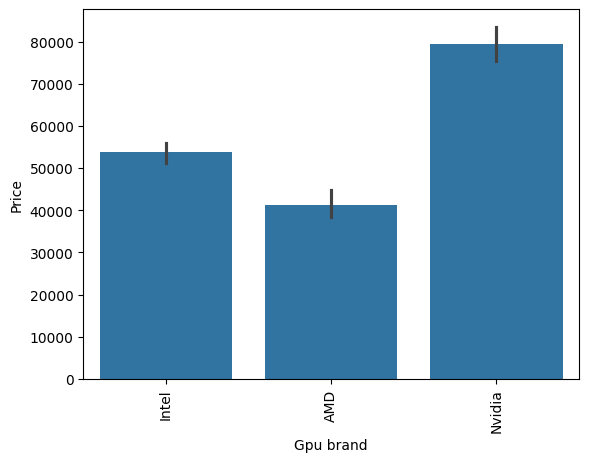

In [83]:
sns.barplot(x = df['Gpu brand'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [84]:
df.drop(columns=['Gpu'], inplace = True)